In [195]:
import numpy as np
import healpy as hp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import stats
import random
#importing all of the things we need

NSIDE = 32   # this is about 1.8 deg between bins... https://lambda.gsfc.nasa.gov/toolbox/tb_pixelcoords.cfm

n_dec_bins = 33

#64

#list(range(20,101))

#declination bins are 25, can capture the artifacts when making this nummber higher

# define some helper functions

#convert healpy "theta" to dec
def theta_to_dec(theta):
    # shift dec from 0-180 to (90, -90)   (note -1.0*(theta-90) to get North pole at 0 "theta" for healpy)
    return -1.0*(theta - np.pi/2.0)

#find out which bin an event is in based on "the_bins" boundaries
def which_dec_bin(dec, the_bins):
        for i in range(0, len(the_bins)-1):
            if the_bins[i] <= dec < the_bins[i+1]:
                return i          

In [189]:
# let's load up the data
np_dtype = np.float64
data_7 = np.genfromtxt('./data/events/IC86_VII_exp.csv', names=True, dtype=np_dtype)
data_6 = np.genfromtxt('./data/events/IC86_VI_exp.csv', names=True, dtype=np_dtype)
data_5 = np.genfromtxt('./data/events/IC86_V_exp.csv', names=True, dtype=np_dtype)
data_4 = np.genfromtxt('./data/events/IC86_IV_exp.csv', names=True, dtype=np_dtype)
data_3 = np.genfromtxt('./data/events/IC86_III_exp.csv', names=True, dtype=np_dtype)
data_2 = np.genfromtxt('./data/events/IC86_II_exp.csv', names=True, dtype=np_dtype)
data_1 = np.genfromtxt('./data/events/IC86_I_exp.csv', names=True, dtype=np_dtype)
## Concantenate these together into 1
data_7y = np.concatenate((data_7, data_6, data_5, data_4, data_3, data_2, data_1))
#data_7y = np.concatenate((data_7, data_6))
#use data with only two bins for faster testing

In [190]:
## Ensure that everything got put together correctly...
print(len(data_7y))
#print(len(data_1)+len(data_2)+len(data_3)+len(data_4)+len(data_5)+len(data_6)+len(data_7))
data_7y

897406


array([(57891.17694387, 2.9 , 0.89, 343.245,  13.768,  46.287, 103.86 ),
       (57891.18095108, 3.13, 0.35, 127.003,  35.576, 263.912, 125.521),
       (57891.18877491, 4.7 , 0.2 , 216.473, -23.266, 177.292,  66.652),
       ...,
       (56062.4089819 , 2.79, 3.03, 240.151,  51.702, 230.512, 141.666),
       (56062.41103019, 3.42, 0.74, 245.893,  37.043, 225.485, 127.012),
       (56062.41621633, 2.84, 0.2 , 346.941,  67.104, 126.317, 157.163)],
      dtype=[('MJDdays', '<f8'), ('log10EGeV', '<f8'), ('AngErrdeg', '<f8'), ('RAdeg', '<f8'), ('Decdeg', '<f8'), ('Azimuthdeg', '<f8'), ('Zenithdeg', '<f8')])

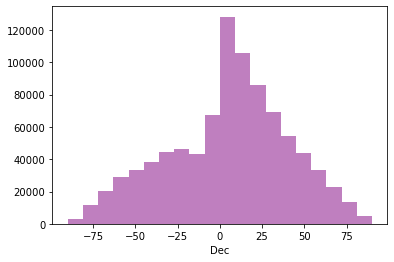

[  2903.  11648.  20361.  29228.  33011.  38130.  44577.  46162.  42944.
  67198. 128246. 105554.  85991.  68992.  54674.  43612.  33471.  22714.
  13414.   4576.] [-8.99570e+01 -8.09603e+01 -7.19636e+01 -6.29669e+01 -5.39702e+01
 -4.49735e+01 -3.59768e+01 -2.69801e+01 -1.79834e+01 -8.98670e+00
  1.00000e-02  9.00670e+00  1.80034e+01  2.70001e+01  3.59968e+01
  4.49935e+01  5.39902e+01  6.29869e+01  7.19836e+01  8.09803e+01
  8.99770e+01]


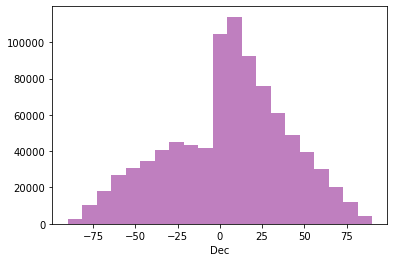

[  2562.  10621.  18139.  26616.  30961.  34531.  40810.  45036.  43141.
  41561. 104456. 114092.  92209.  75990.  61077.  49021.  39469.  30301.
  20474.  12214.   4125.] [-89.957      -81.38871429 -72.82042857 -64.25214286 -55.68385714
 -47.11557143 -38.54728571 -29.979      -21.41071429 -12.84242857
  -4.27414286   4.29414286  12.86242857  21.43071429  29.999
  38.56728571  47.13557143  55.70385714  64.27214286  72.84042857
  81.40871429  89.977     ]


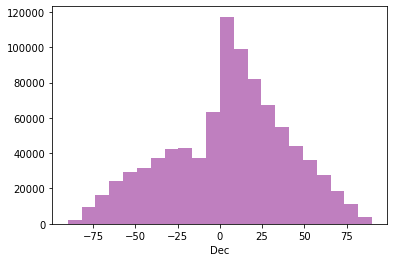

[  2329.   9551.  16439.  24265.  29211.  31846.  37038.  42417.  42732.
  37068.  63266. 117308.  98799.  81961.  67464.  54620.  44349.  35881.
  27493.  18396.  11242.   3731.] [-8.99570000e+01 -8.17781818e+01 -7.35993636e+01 -6.54205455e+01
 -5.72417273e+01 -4.90629091e+01 -4.08840909e+01 -3.27052727e+01
 -2.45264545e+01 -1.63476364e+01 -8.16881818e+00  1.00000000e-02
  8.18881818e+00  1.63676364e+01  2.45464545e+01  3.27252727e+01
  4.09040909e+01  4.90829091e+01  5.72617273e+01  6.54405455e+01
  7.36193636e+01  8.17981818e+01  8.99770000e+01]


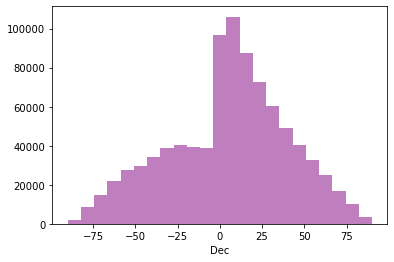

[  2108.   8664.  14998.  22160.  27426.  29479.  34128.  38793.  40443.
  39234.  38626.  96931. 106089.  87321.  72868.  60275.  49303.  40319.
  32736.  25124.  16651.  10331.   3399.] [-89.957      -82.13378261 -74.31056522 -66.48734783 -58.66413043
 -50.84091304 -43.01769565 -35.19447826 -27.37126087 -19.54804348
 -11.72482609  -3.9016087    3.9216087   11.74482609  19.56804348
  27.39126087  35.21447826  43.03769565  50.86091304  58.68413043
  66.50734783  74.33056522  82.15378261  89.977     ]


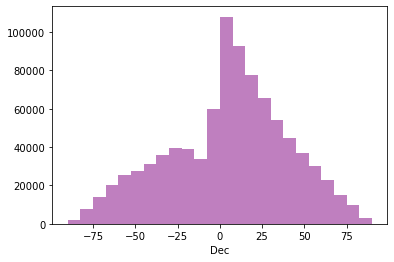

[  1909.   7768.  13918.  20235.  25721.  27600.  31219.  35870.  39580.
  39069.  33580.  59693. 108048.  93001.  77731.  65783.  54225.  44669.
  36969.  30065.  22828.  15228.   9628.   3069.] [-8.995700e+01 -8.245975e+01 -7.496250e+01 -6.746525e+01 -5.996800e+01
 -5.247075e+01 -4.497350e+01 -3.747625e+01 -2.997900e+01 -2.248175e+01
 -1.498450e+01 -7.487250e+00  1.000000e-02  7.507250e+00  1.500450e+01
  2.250175e+01  2.999900e+01  3.749625e+01  4.499350e+01  5.249075e+01
  5.998800e+01  6.748525e+01  7.498250e+01  8.247975e+01  8.997700e+01]


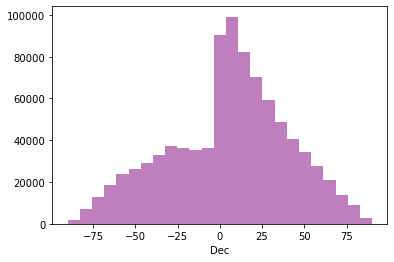

[ 1770.  6989. 12871. 18501. 24009. 26051. 28952. 33104. 37464. 36309.
 35475. 36529. 90348. 99158. 82432. 70296. 59064. 48937. 40792. 34180.
 27516. 20981. 13968.  8936.  2774.] [-89.957   -82.75964 -75.56228 -68.36492 -61.16756 -53.9702  -46.77284
 -39.57548 -32.37812 -25.18076 -17.9834  -10.78604  -3.58868   3.60868
  10.80604  18.0034   25.20076  32.39812  39.59548  46.79284  53.9902
  61.18756  68.38492  75.58228  82.77964  89.977  ]


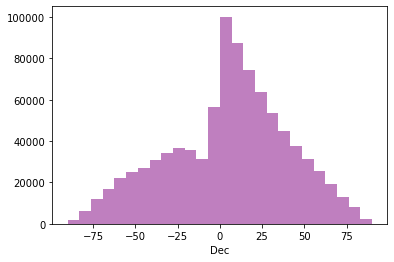

[  1637.   6325.  11929.  17000.  22155.  25067.  26904.  30730.  34418.
  36439.  35699.  31138.  56721. 100183.  87688.  74220.  63630.  53450.
  44748.  37470.  31485.  25418.  19203.  12928.   8260.   2561.] [-8.99570000e+01 -8.30364615e+01 -7.61159231e+01 -6.91953846e+01
 -6.22748462e+01 -5.53543077e+01 -4.84337692e+01 -4.15132308e+01
 -3.45926923e+01 -2.76721538e+01 -2.07516154e+01 -1.38310769e+01
 -6.91053846e+00  1.00000000e-02  6.93053846e+00  1.38510769e+01
  2.07716154e+01  2.76921538e+01  3.46126923e+01  4.15332308e+01
  4.84537692e+01  5.53743077e+01  6.22948462e+01  6.92153846e+01
  7.61359231e+01  8.30564615e+01  8.99770000e+01]


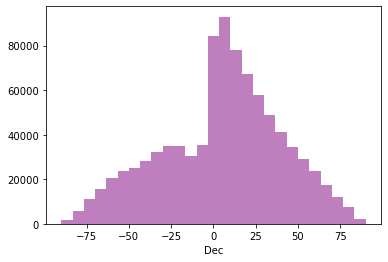

[ 1515.  5763. 10979. 15692. 20753. 23824. 25141. 28386. 32187. 35104.
 34726. 30660. 35233. 84502. 92988. 78170. 67303. 57799. 48686. 41118.
 34504. 29104. 23604. 17633. 11936.  7750.  2346.] [-89.957      -83.29277778 -76.62855556 -69.96433333 -63.30011111
 -56.63588889 -49.97166667 -43.30744444 -36.64322222 -29.979
 -23.31477778 -16.65055556  -9.98633333  -3.32211111   3.34211111
  10.00633333  16.67055556  23.33477778  29.999       36.66322222
  43.32744444  49.99166667  56.65588889  63.32011111  69.98433333
  76.64855556  83.31277778  89.977     ]


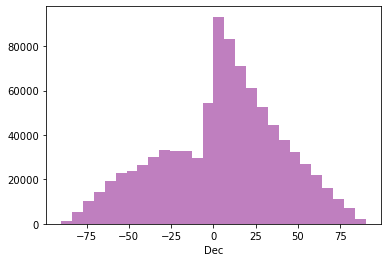

[ 1414.  5250. 10184. 14474. 19289. 22794. 23746. 26279. 30058. 33424.
 32628. 32877. 29548. 54197. 93240. 83124. 70938. 61283. 52629. 44426.
 37817. 32135. 27027. 21812. 16309. 11058.  7247.  2199.] [-8.99570000e+01 -8.35307857e+01 -7.71045714e+01 -7.06783571e+01
 -6.42521429e+01 -5.78259286e+01 -5.13997143e+01 -4.49735000e+01
 -3.85472857e+01 -3.21210714e+01 -2.56948571e+01 -1.92686429e+01
 -1.28424286e+01 -6.41621429e+00  1.00000000e-02  6.43621429e+00
  1.28624286e+01  1.92886429e+01  2.57148571e+01  3.21410714e+01
  3.85672857e+01  4.49935000e+01  5.14197143e+01  5.78459286e+01
  6.42721429e+01  7.06983571e+01  7.71245714e+01  8.35507857e+01
  8.99770000e+01]


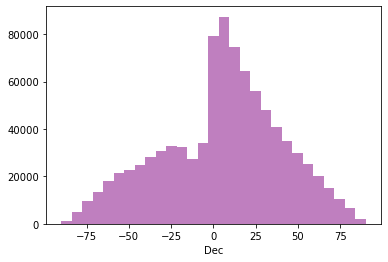

[ 1314.  4795.  9474. 13439. 18097. 21486. 22502. 24873. 28026. 30879.
 32944. 32430. 27298. 34232. 79346. 87399. 74417. 64649. 56236. 48182.
 40840. 34976. 29940. 25141. 20320. 15010. 10331.  6769.  2061.] [-89.957      -83.75237931 -77.54775862 -71.34313793 -65.13851724
 -58.93389655 -52.72927586 -46.52465517 -40.32003448 -34.11541379
 -27.9107931  -21.70617241 -15.50155172  -9.29693103  -3.09231034
   3.11231034   9.31693103  15.52155172  21.72617241  27.9307931
  34.13541379  40.34003448  46.54465517  52.74927586  58.95389655
  65.15851724  71.36313793  77.56775862  83.77237931  89.977     ]


In [193]:
#let's bin the data into n_dec_bins using the hist function from pyply package
# plt.hist returns 2 objects we need:  list of counts in each bin (n_dec_bins, and list of bin boundaries (n_dec_bins +1)
#for n_dec_bins in range(20,30):
decbin_content,decbin_boundaries,extra = plt.hist(data_7y['Decdeg'], n_dec_bins, facecolor='purple', alpha=0.5)
plt.xlabel('Dec')
plt.show()
print(decbin_content,decbin_boundaries)
#plot with raw values of data, just the declination values
#gives graph, number of events in bin, and bin boundaries

In [178]:
#Let's calculate the number of PIXELS in each declination band using the position of each
# generate a list of pixel
dec_vals = []
for bin in range(0,hp.nside2npix(NSIDE)):
    theta,phi = hp.pix2ang(NSIDE,bin)
    dec_vals.append(np.degrees(theta_to_dec(theta)))
#look at all bins in empty skymap (every pixel) find the theta and phi value for each pixel

dec_vals2 = np.array(dec_vals)
#get long list of dec values, convert it to array

# use numpy's digitize function to "count in bins" -> returns an array telling you which bin each value is in
hp_bins_mask = np.digitize(dec_vals2, decbin_boundaries)
#use digitize to tell you which bin the dec value is in

# count number of bins at each bin mask value:  total in that dec range
hp_bins_perdec = [len(dec_vals2[hp_bins_mask == i]) for i in range(1, len(decbin_boundaries))]
#how often a ceratin bin has a certain number of objects

print(len(hp_bins_perdec),hp_bins_perdec,sum(hp_bins_perdec))

64 [4, 20, 36, 52, 68, 84, 100, 116, 132, 148, 80, 172, 188, 204, 220, 236, 124, 256, 256, 256, 256, 256, 256, 256, 256, 384, 256, 256, 256, 384, 256, 384, 256, 256, 384, 256, 256, 256, 384, 256, 256, 256, 256, 256, 256, 256, 256, 124, 236, 220, 204, 188, 172, 80, 148, 132, 116, 100, 84, 68, 52, 36, 20, 4] 12288


In [179]:
# now let's calculate the averge background per-pixel in each dec band
avg_bkg_perbin = decbin_content/hp_bins_perdec
print(avg_bkg_perbin)
#gives average count of every bin in each dec band

[114.25        31.25        38.75        44.73076923  50.80882353
  53.38095238  48.45        51.79310345  50.56060606  53.28378378
 107.8         54.3255814   53.14361702  49.60784314  46.65909091
  45.13559322  89.65322581  46.0859375   48.88671875  51.98046875
  53.01171875  56.0546875   59.77734375  57.453125    54.03515625
  39.5546875   56.58984375  47.6796875   47.31640625  39.08072917
  68.41015625  83.31770833 158.9296875  160.69921875 101.1796875
 141.75       130.58984375 122.6796875   77.3125     106.59765625
 102.99609375  94.52734375  88.82421875  82.0859375   76.1484375
  70.7421875   66.65234375 126.54032258  61.89830508  62.77272727
  62.57352941  61.94680851  62.89534884 121.975       59.08108108
  58.43181818  56.5862069   54.98        55.88095238  57.85294118
  62.26923077  65.05555556  64.2         92.75      ]


Using  12288  pixels
Plotted points:  897406


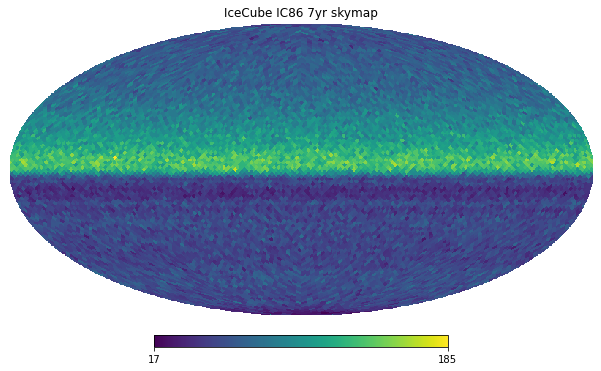

In [180]:
# Let's bin the data in a skymap healpix object
print('Using ',hp.nside2npix(NSIDE), ' pixels')
## seed skymap with 0 counts in each bin
skymap = np.zeros(hp.nside2npix(NSIDE))
n_plot = 0
for ev in data_7y:
    if np.abs(ev["Decdeg"]) < 91.0:   
        # shift dec to 0-180 instead of 90, -90   (note -1.0* (dec-90) to get North pole at 0 "theta" for healpy)
        binnum = hp.ang2pix(NSIDE, -1.0*(np.radians(ev["Decdeg"])-np.pi/2.0), np.radians(ev["RAdeg"]))
        skymap[binnum] += 1
        n_plot += 1
hp.mollview(skymap, title="IceCube IC86 7yr skymap")
print('Plotted points: ', n_plot)

Plotted points:  897406  Max bin: 6094 88.68229166666667


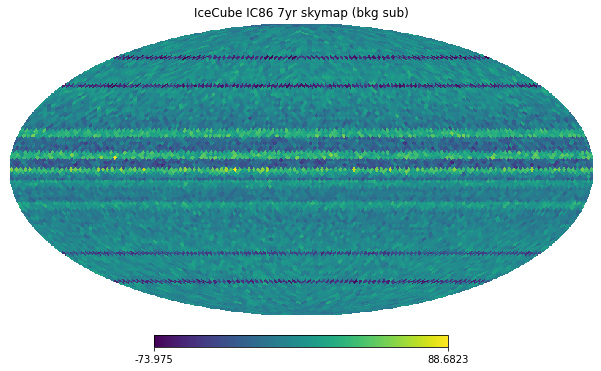

In [181]:
# Calculate the difference between observed and expected counts, as well as the poisson pmf (assuming expected bkg is average expected rate)
#then plot the difference skymap
skymap2 = []
p_val_map =[]
for bin in range(0,hp.nside2npix(NSIDE)):
    theta,phi = hp.pix2ang(NSIDE,bin)
    bkg_bin = which_dec_bin(np.degrees(theta_to_dec(theta)),decbin_boundaries)
    skymap2.append(skymap[bin] - avg_bkg_perbin[bkg_bin])
    p_val_map.append(stats.poisson.pmf(skymap[bin], avg_bkg_perbin[bkg_bin]))

skymap2_np  = np.array(skymap2)
hp.mollview(skymap2_np, title="IceCube IC86 7yr skymap (bkg sub)")
print('Plotted points: ', n_plot, ' Max bin:',np.argmax(skymap2_np), np.max(skymap2_np))
#skymap of differnce you would expect from background

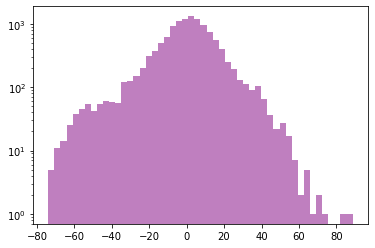

In [182]:
# plot the histogram of the 'counts - expected' values in the map
a,b,c = plt.hist(skymap2_np, 50, facecolor='purple', alpha=0.5,log=True)
# is it centered near zero?  Does it look somewhat gaussian
#we want a high p value, but this is probably going to be a data artifact

17.146909156578534 6094
1.5707963267948966 0.7117670855789374
Most significant spot: log_10(pvalue): 17.146909156578534  at DEC, RA:  -0.0 40.78124999999999


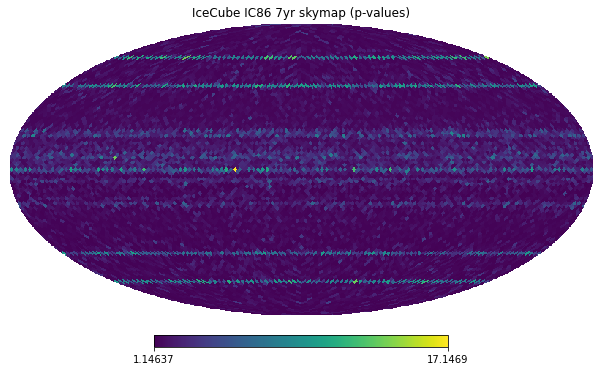

In [183]:
# plot the skymap of poission p-values (-log10(pvalue))

p_val_map_np  = -1.0*np.log10(np.array(p_val_map))
hp.mollview(p_val_map_np, title="IceCube IC86 7yr skymap (p-values)")

# Find the most interesting spot:
max_pval = np.max(p_val_map_np)
max_bin  = np.argmax(p_val_map_np)
print(max_pval, max_bin)
theta_max ,phi_max = hp.pix2ang(NSIDE,max_bin)
print(theta_max,phi_max)

print('Most significant spot: log_10(pvalue):', max_pval, ' at DEC, RA: ', np.degrees(theta_to_dec(theta_max)), np.degrees(phi_max))
#can trsut this data by comparing it to scrambles
#is the most interesting spot interesting? is or it consistent with the scrambles

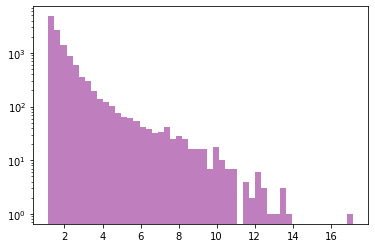

In [184]:
# plot the histogram of the p-values in the map
a,b,c = plt.hist(p_val_map_np, 50, facecolor='purple', alpha=0.5,log=True)
# is it centered near zero?  Does it look somewhat gaussian

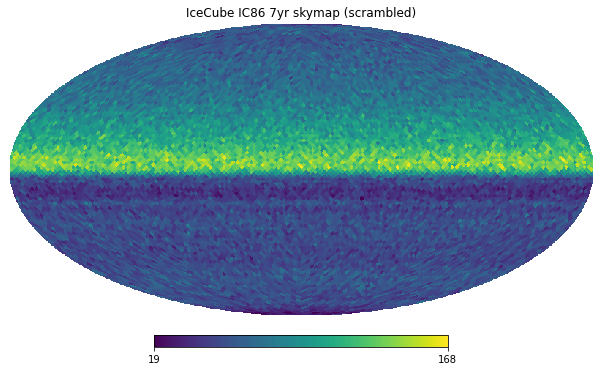

In [185]:
# let's think about scrambling...
def do_a_scramble(events):
    skymap_scr = np.zeros(hp.nside2npix(NSIDE))
    random.seed()
    for ev in events:
        if np.abs(ev["Decdeg"]) < 91.0:  
            # generate a new random RA value (2 options, pick another RA, or pick from 0,2pi uniformly)
            new_ra = random.uniform(0,2.0*np.pi)
            binnum = hp.ang2pix(NSIDE, -1.0*(np.radians(ev["Decdeg"])-np.pi/2.0), new_ra)
            skymap_scr[binnum] += 1
    return skymap_scr

new_skymap = do_a_scramble(data_7y)
hp.mollview(new_skymap, title="IceCube IC86 7yr skymap (scrambled)")

In [186]:
# let's do many scrambles  For each scrable, calculate the most significant point and which bin that's in.
def do_n_scrambles(events, n_scrambles = 100):
    max_p_values_scr = []
    max_p_bin_scr = []
    for trial in range(0,n_scrambles):
        this_map = do_a_scramble(events)
        this_p_val_map = []
        for bin in range(0,hp.nside2npix(NSIDE)):
            theta,phi = hp.pix2ang(NSIDE,bin)
            bkg_bin = which_dec_bin(np.degrees(theta_to_dec(theta)),decbin_boundaries)
            this_p_val_map.append(stats.poisson.pmf(this_map[bin], avg_bkg_perbin[bkg_bin]))
        this_p_val_map_np = -1.0*np.log10(np.array(this_p_val_map))
        max_p_values_scr.append(np.max(this_p_val_map_np))
        max_p_bin_scr.append(np.argmax(this_p_val_map_np))
    return max_p_values_scr, max_p_bin_scr

# test it!
p_vals_max_scr, bin_max_scr = do_n_scrambles(data_7y,n_scrambles = 3) 
#doing 3 scrambles, can increase but takes forever

In [187]:
print(p_vals_max_scr, bin_max_scr)
# compare where in the distribution of these scrambled max_p_values the real data is at?  Is it rare or common?
#for every scramble, print 2 numbers: the maximum p value and the assiciated bin number
#most of the ones with the high probability are in the horizon, some type of data artifact

[16.497372920481876, 13.529903785854259, 16.67921172805458] [789, 838, 11499]


In [194]:
import healpy as hp
NSIDE=32
thetas = []
for bin in range(0,hp.nside2npix(NSIDE)):
    theta,phi = hp.pix2ang(NSIDE,bin)
    thetas.append(theta)
    
print(len(thetas))

uniques = []
for val in thetas:
    if val not in uniques:
        uniques.append(val)
        
print(len(uniques))
print(uniques)
#find number dec bins in the skymap

12288
127
[0.02551621035741883, 0.05103657515266638, 0.07656525491520565, 0.10210642238260403, 0.12766426866687355, 0.1532430094961162, 0.17884689155751526, 0.20448019896853498, 0.23014725990424112, 0.25585245340993734, 0.28160021642986005, 0.3073950510845034, 0.33324153223126673, 0.3591443153455892, 0.3851081447625733, 0.4111378623223478, 0.4372384164661384, 0.46341487183425784, 0.48967241942204903, 0.5160163873553204, 0.542452252353078, 0.5689856519524864, 0.5956223975791426, 0.6223684885550206, 0.6492301271470778, 0.6762137347716626, 0.7033259694838112, 0.7305737448965524, 0.7579642506937965, 0.7855049749216982, 0.8132037282680554, 0.8410686705679303, 0.8686820511897307, 0.895664793857865, 0.9220766484543186, 0.9479697413828938, 0.9733899101495465, 0.9983777547020765, 1.022969475827947, 1.0471975511965979, 1.0710912860355324, 1.0946772658831003, 1.1179797320499711, 1.141020895490369, 1.1638212011661395, 1.1863995522992576, 1.2087735018894246, 1.2309594173407747, 1.252972622867016, 1

Items below here are older, for reference...

In [ ]:
coszen = np.cos(np.radians(data_7y['Zenithdeg']))
plt.hist(coszen, 20, facecolor='purple', alpha=0.5)
plt.xlabel('Cos(Zenith)')
plt.show()

In [ ]:
plt.hist(data_7y['RAdeg'], 50, facecolor='red', alpha=0.5)
plt.xlabel('RA(deg)')
plt.show()

In [ ]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

sindec = np.sin(np.radians(data_7y['Decdeg']))
plt.hist(sindec, 50, facecolor='purple', alpha=0.5)
plt.xlabel('Sin(Dec)')
plt.show()

In [ ]:
plt.hist(data_7y['Azimuthdeg'], 50, facecolor='red', alpha=0.5)
plt.xlabel('Azimuth(deg)')
plt.show()

In [ ]:
masktf = [data_7y['log10EGeV']<4.0]

reduced_azi = data_7y['Azimuthdeg'][data_7y['log10EGeV']<4.0]
print(masktf, len(masktf), len(data_7y), len(reduced_azi))


#reduce_azi = [data_7y['Azimuthdeg'](data_7y['log10EGeV']>4.0)]
plt.hist(reduced_azi, 50, facecolor='red', alpha=0.5)
plt.xlabel('Azimuth(deg)')
plt.show()

In [ ]:
## Calculate the exposure in time of this sample using the 'uptime' data
exposure_7 = np.genfromtxt('./data/uptime/IC86_VII_exp.csv', names=True, dtype=np_dtype)
exposure_6 = np.genfromtxt('./data/uptime/IC86_VI_exp.csv', names=True, dtype=np_dtype)
exposure_5 = np.genfromtxt('./data/uptime/IC86_V_exp.csv', names=True, dtype=np_dtype)
exposure_4 = np.genfromtxt('./data/uptime/IC86_IV_exp.csv', names=True, dtype=np_dtype)
exposure_3 = np.genfromtxt('./data/uptime/IC86_III_exp.csv', names=True, dtype=np_dtype)
exposure_2 = np.genfromtxt('./data/uptime/IC86_II_exp.csv', names=True, dtype=np_dtype)
exposure_1 = np.genfromtxt('./data/uptime/IC86_I_exp.csv', names=True, dtype=np_dtype)
## Concantenate these together into 1
exposure_7y = np.concatenate((exposure_7, exposure_6, exposure_5, exposure_4, exposure_3, exposure_2, exposure_1))

In [ ]:
exposure_7y


In [ ]:
total_livetime = 0
for run in exposure_7y:
    total_livetime += run['MJD_stopdays'] - run['MJD_startdays']
    
print(total_livetime, 'days')

In [ ]:
weight = []
for ev in data_7y:
    weight.append(1.0/total_livetime)
print(len(weight), weight[0])
sindec = np.sin(np.radians(data_7y['Decdeg']))
values, bins, junk = plt.hist(sindec, bins=20, facecolor='purple', alpha=0.5, weights = weight)
plt.xlabel('Sin(Dec)')
plt.ylabel('Events per day')
plt.show()
print(values)
print(bins)